# polynomial regression 

In [ ]:
#Polynomial Regression, where the x-axis represents the input data X and
#y-axis represents y thetarget values with 1000 examples(m) and 1 feature(n).

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
np.random.seed(42)
x=np.random.rand(1000,1)
y=5*((x)**(2)+x+3) + np.random.rand(1000,1)

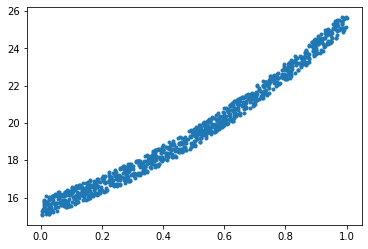

In [ ]:
plt.plot(x,y,'.')#polynomial regression is used to fit non-linear 
#polynomial regression is another version of standarad linear regression

In [ ]:
#If we use the standard Linear Regression for this data, we would only be able to fit a straight line to the data

In [ ]:
def loss(y,y_hat):            #loss function mean square error loss(y_hat-y)2,minimize function in order to find the parameters
    loss=np.mean((y_hat-y)**2)#(y_hat-y)2 loss function is the error for the individual data points
    return loss               #loss function refers to the simple training example 

In [ ]:
def gradient(x,y,y_hat):# partial derivaties of the loss function with respect to w and b 
    m=x.shape[0]
    dw=(1/m)*np.dot(x.T,(y_hat-y))
    db=(1/m)*np.sum((y_hat-y))#i/n(sum(yi-ax2+bx+c))^2
    return dw,db# the main aim of gradient is to minimize the error of model's prediction,to relative to orginal data   

In [ ]:
def x_transform(X, degrees):
    t = X.copy()#x will be the input
    for i in degrees:# degress:means a list we add to x^ value feature to the input x value
        X = np.append(X, t**i, axis=1)# appending  columns to higher values to  degree of x
            
    return X

In [ ]:
def train(X, y, bs, degrees, epochs,lr): #x- input
    x = x_transform(X, degrees)          #y- target 
    m, n = x.shape                       #bs- batch size
    w = np.zeros((n,1))                  #epochs-number of iterations
    b = 0                                #degrees-we add x value feature to the input 
    y = y.reshape(m,1)                   #we will do the partial derivates for each and every parameter ten we will get the 
    losses = []                          # able to get the gradient for each coefficent 
    for epoch in range(epochs):          # these are the values give the slope of loss function to each specific coefficent
        for i in range((m-1)//bs + 1):   #  with obtain coefficent we will find the gradient for eavh coeffiient x and y
            start_i = i*bs               # lr means learning rate we will update the coefficents 
            end_i = start_i + bs         #learning rate =w-lr*dw
            xb = x[start_i:end_i]        #learning rate =w-lr*db
            yb = y[start_i:end_i]
            y_hat = np.dot(xb, w) + b# caluclating the hypothesis
            dw, db = gradient(xb, yb, y_hat)#getting gradient of loss w.r.t parameters
            w -= lr*dw#learning rate =w-lr*dw
            b -= lr*db#learning rate = w-lr*db
        l = loss(y, np.dot(x, w) + b)# calculating the loss
        losses.append(l)
    return w, b, losses

In [ ]:
def predict(x, w, b, degrees):#prediction function
    x1 = x_transform(x, degrees)#b-bias
    return np.dot(x1, w) + b# w-weights,#x-input

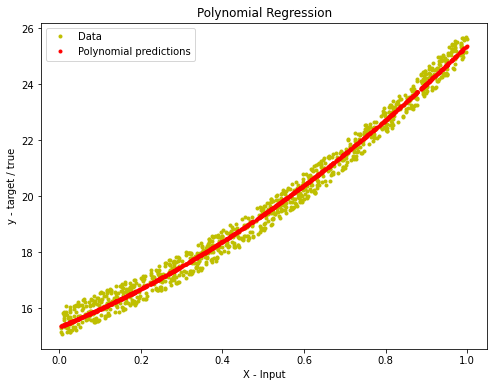

In [ ]:
w, b, l = train(x, y, bs=100, degrees=[2], epochs=1000,
                lr=0.01)
fig = plt.figure(figsize=(8,6))
plt.plot(x, y, 'y.')
plt.plot(x, predict(x, w, b, [2]), 'r.')
plt.legend(["Data", "Polynomial predictions"])
plt.xlabel('X - Input')
plt.ylabel('y - target / true')
plt.title('Polynomial Regression')
plt.show()

In [ ]:
#Since we have collected loss for every iteration in the list losses,
#try plotting the losses against the iterations (epochs) 
#to see whether the loss goes down while training.

In [ ]:
def r2_score(y, y_hat):
    return 1 - (np.sum((np.array(y_hat)-np.array(y))**2)/
                np.sum((np.array(y)-np.mean(np.array(y)))**2))
r2_score(y, predict(x, w, b, [2]))

0.9551785719360419

In [ ]:
#Calculating the r2 score for our predictions to see how good we are doing.